In [1]:
# Import necessary modules
import sys
import os
import torch 
# Set root folder to project root
os.chdir(os.path.dirname(os.getcwd()))

# Add root folder to path
sys.path.append(os.getcwd())

from src.utils.config import Hyperparameters
from src.utils.model_loading import load_model
from src.utils.maze_loading import load_mazes
from src.utils.testing import is_correct
from src.utils.analysis import plot_mazes

2025-08-04 12:31:42,336 - src.utils.model_loading - INFO - Loaded model: dt_net from models/dt_net/original.pth to device: cuda:0
2025-08-04 12:31:42,338 - src.utils.maze_loading - INFO - Attempting 10 mazes to generate 10 mazes with size: 9, percolation: 0.3, and deadend_start: True
2025-08-04 12:31:42,345 - src.utils.maze_loading - INFO - Attempting 20 mazes to generate 10 mazes with size: 9, percolation: 0.3, and deadend_start: True
2025-08-04 12:31:42,370 - src.utils.maze_loading - INFO - Loaded 10 mazes with size: 9, percolation: 0.3, and deadend_start: True


10 out of 10 predictions are correct.
Saving maze plots to outputs/visuals/mazes/predictions_dt_net_size-9_iters-300


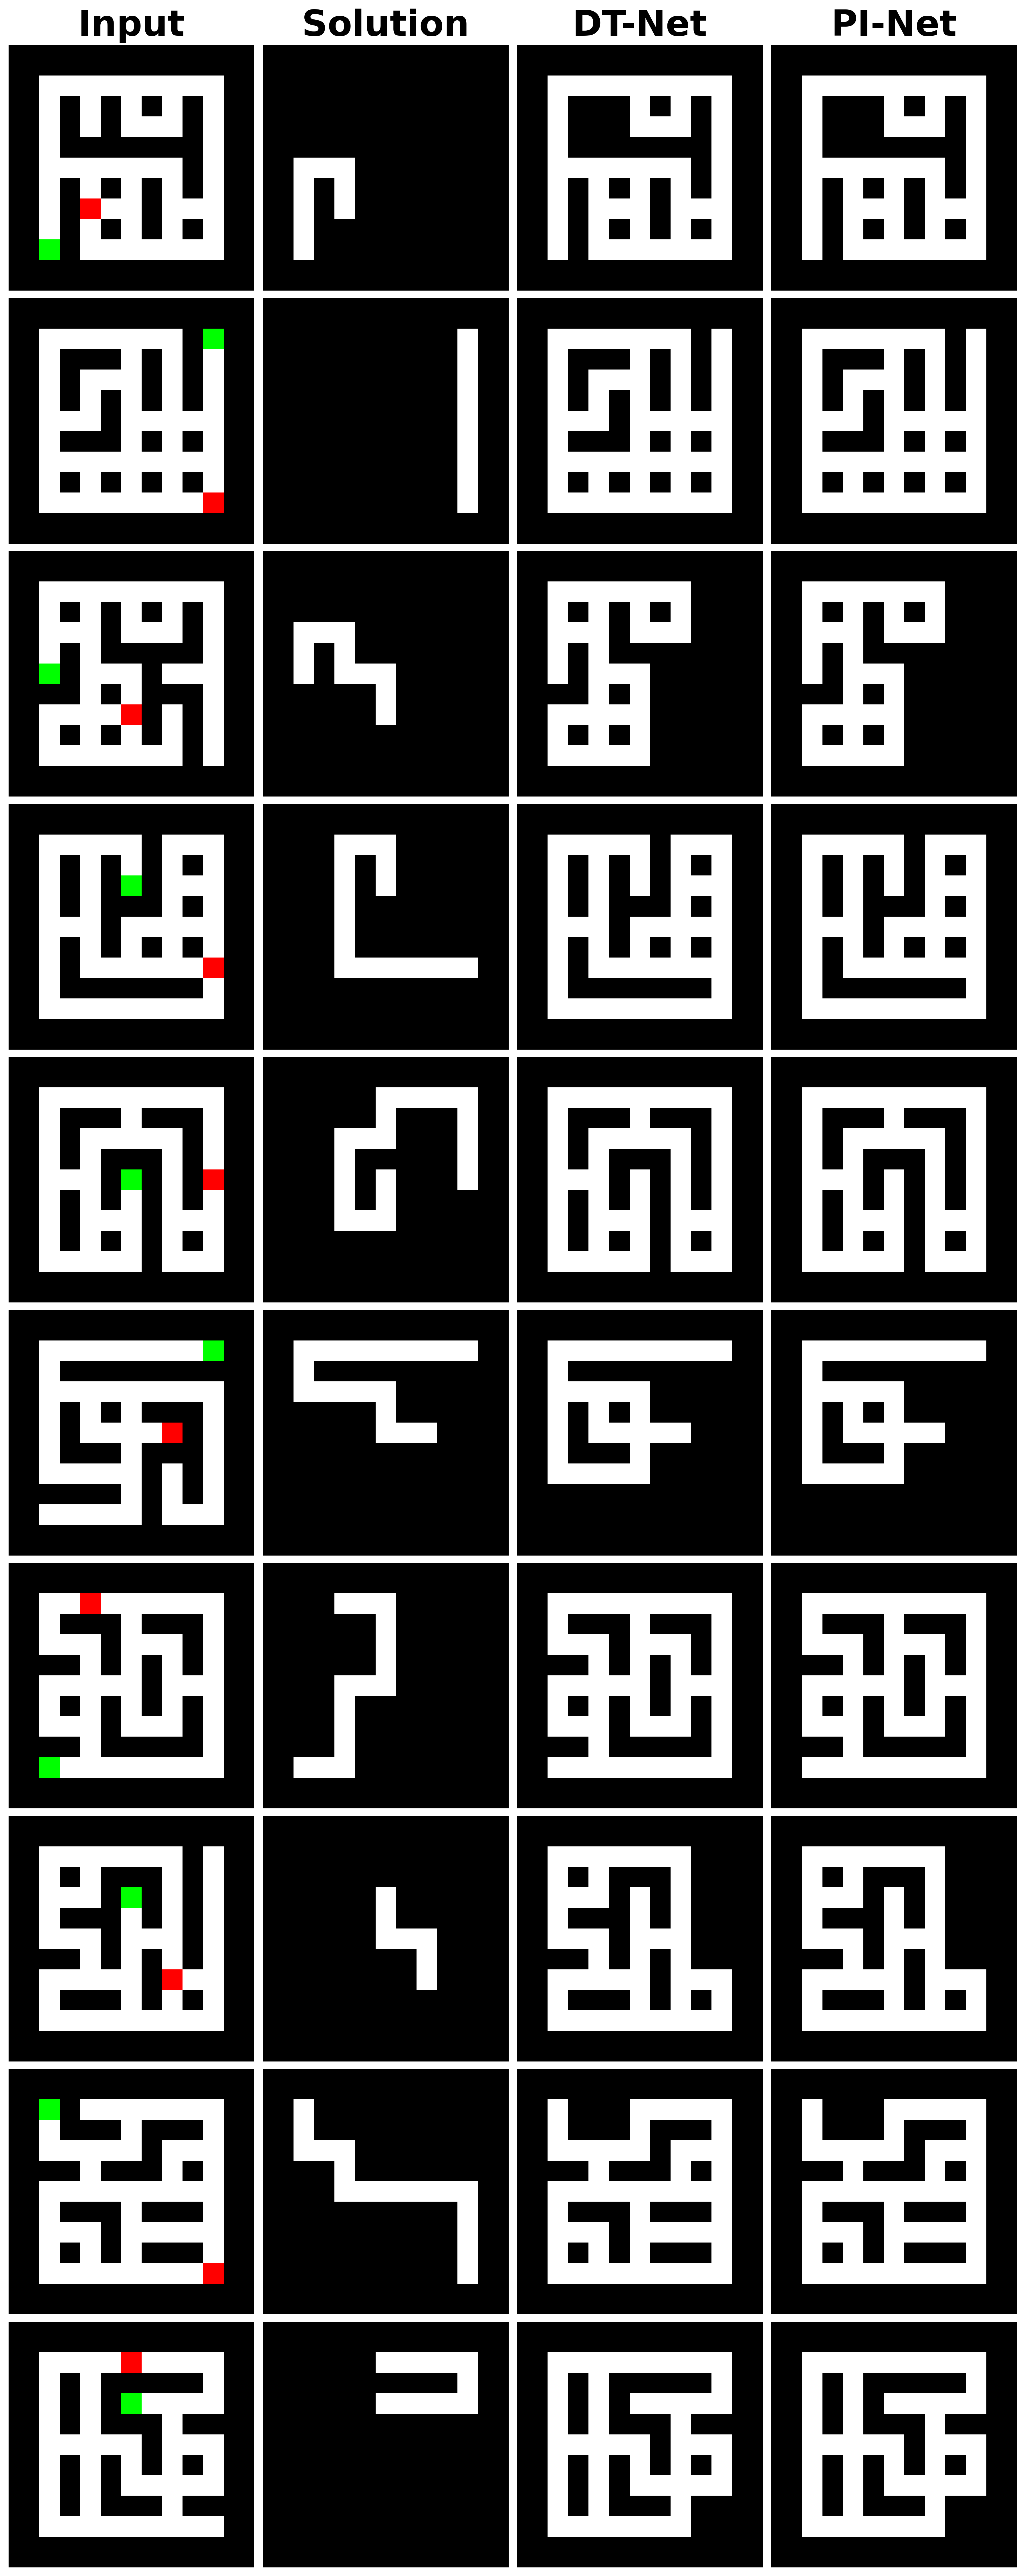

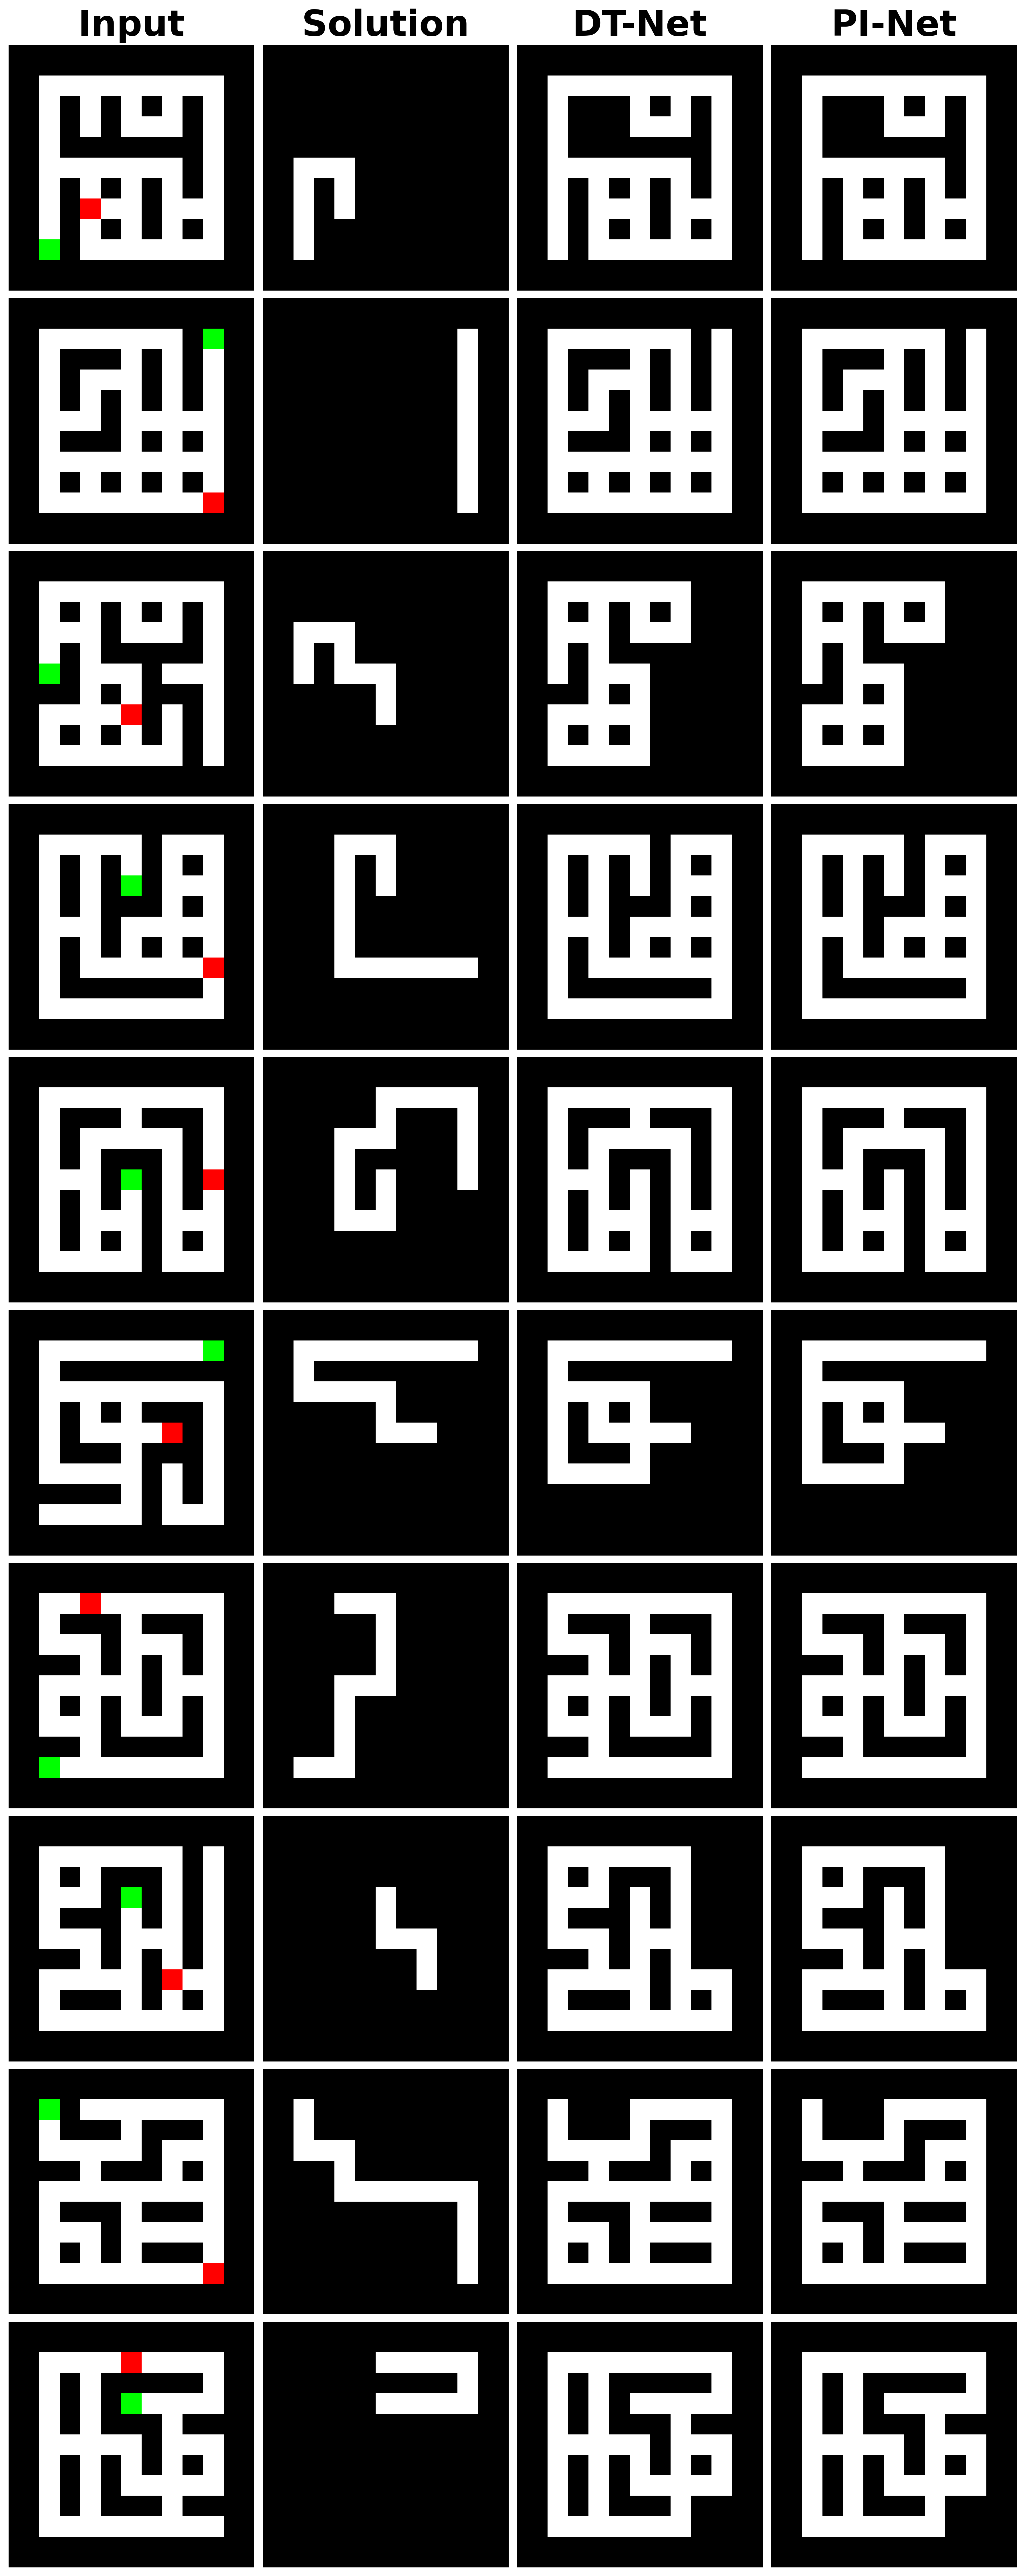

In [2]:
# Load model
dt_net = load_model(pretrained='models/dt_net/original.pth')
deadend_fill = load_model(model_name='deadend_fill')

# Load mazes
hyperparams = Hyperparameters()
hyperparams.iters = 300
hyperparams.num_mazes = 10
hyperparams.percolation = 0.3
hyperparams.maze_size = 9
inputs, solutions = load_mazes(hyperparams)

# Predict
dt_net_predictions = dt_net.predict(inputs, iters=hyperparams.iters)
deadend_fill_predictions = deadend_fill.predict(inputs, iters=hyperparams.iters)

# Evaluate predictions
corrects = is_correct(inputs, dt_net_predictions, deadend_fill_predictions)
print(f'{corrects.sum()} out of {len(corrects)} predictions are correct.')

# Plot results
file_name=f'outputs/visuals/mazes/predictions_{dt_net.name}_size-{hyperparams.maze_size}_iters-{hyperparams.iters}'
print(f'Saving maze plots to {file_name}')
plot_mazes(
    [('Input', inputs), ('Solution', solutions), ('DT-Net', dt_net_predictions), ('PI-Net', deadend_fill_predictions)],
    file_name=file_name,
)